In [1]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
import matplotlib.pyplot as plt
import time
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

def train_and_evaluate_logistic_regression(x_train, y_train, x_val, y_val,
                                            x_test, y_test, penalty='l2', C=1.0,
                                            solver='lbfgs', max_iter=100, l1_ratio=None):
    """Trains and evaluates Logistic Regression with specified parameters."""

    start_time = time.time()
    if penalty == 'elasticnet':
        model = LogisticRegression(penalty=penalty, C=C, solver=solver,
                                   max_iter=max_iter, multi_class='multinomial',
                                   l1_ratio=l1_ratio)
    else:
        model = LogisticRegression(penalty=penalty, C=C, solver=solver,
                                   max_iter=max_iter, multi_class='multinomial')  # For Fashion-MNIST
    model.fit(x_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Validation Loss (using log_loss)
    y_val_prob = model.predict_proba(x_val)
    val_loss = log_loss(y_val, y_val_prob)

    return model, training_time, accuracy, val_loss

Load Flattened Data

In [2]:
# Load Flattened Data (NO PCA)
x_train = np.load('x_train_flat.npy')
x_val = np.load('x_val_flat.npy')
x_test = np.load('x_test_flat.npy')
y_train = np.load('y_train.npy')
y_val = np.load('y_val.npy')
y_test = np.load('y_test.npy')

Scaling the Flattened Data

In [3]:
# Scaling (Crucial)
scaler = StandardScaler()  # Use a different scaler name
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

Model Training and Evaluation

In [4]:
# ---------------------------------------------------------------------------------
# 1. Model Training and Evaluation
# ---------------------------------------------------------------------------------

print(" --- Model Training and Evaluation (No PCA) --- ")

# L2 (Ridge)
l2_model, l2_time, l2_acc, l2_vloss = train_and_evaluate_logistic_regression(
    x_train_scaled, y_train, x_val_scaled, y_val, x_test_scaled, y_test,
    penalty='l2', C=0.01, solver='lbfgs', max_iter=100
)

# L1 (Lasso)
l1_model, l1_time, l1_acc, l1_vloss = train_and_evaluate_logistic_regression(
    x_train_scaled, y_train, x_val_scaled, y_val, x_test_scaled, y_test,
    penalty='l1', C=0.1, solver='saga', max_iter=100
)

# Elastic Net
elasticnet_model, en_time, en_acc, en_vloss = train_and_evaluate_logistic_regression(
    x_train_scaled, y_train, x_val_scaled, y_val, x_test_scaled, y_test,
    penalty='elasticnet', C=0.1, solver='saga', max_iter=100, l1_ratio=0.1  # alpha=0.1 is controlled by C
)

print("L2 (Ridge) Test Accuracy (No PCA):", l2_acc)
print("L1 (Lasso) Test Accuracy (No PCA):", l1_acc)
print("ElasticNet Test Accuracy (No PCA):", en_acc)

print("L2 (Ridge) Validation Loss (No PCA):", l2_vloss)
print("L1 (Lasso) Validation Loss (No PCA):", l1_vloss)
print("ElasticNet Validation Loss (No PCA):", en_vloss)

 --- Model Training and Evaluation (No PCA) --- 


d:\University Work\6th Semester\ML\ML_Semester-Project_i222369_i222325\tfenv311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\University Work\6th Semester\ML\ML_Semester-Project_i222369_i222325\tfenv311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\University Work\6th Semester\ML\ML_Semester-Project_i222369_i222325\tfenv311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid th

L2 (Ridge) Test Accuracy (No PCA): 0.8573333333333333
L1 (Lasso) Test Accuracy (No PCA): 0.8524761904761905
ElasticNet Test Accuracy (No PCA): 0.8529523809523809
L2 (Ridge) Validation Loss (No PCA): 0.4254644987909512
L1 (Lasso) Validation Loss (No PCA): 0.43382906873107596
ElasticNet Validation Loss (No PCA): 0.42973502736834995


Hyperparameter Optimization (L2 Example)

In [5]:
# ---------------------------------------------------------------------------------
# 2. Hyperparameter Optimization
# ---------------------------------------------------------------------------------

print("\n--- Hyperparameter Optimization (No PCA) ---")

# L2 Regularization Strength Tuning
param_grid_l2 = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],  # Inverse of regularization strength
    'solver': ['lbfgs', 'saga', 'liblinear']
}

grid_search_l2 = GridSearchCV(
    LogisticRegression(penalty='l2', max_iter=100, multi_class='multinomial'),
    param_grid_l2, cv=3, scoring='accuracy', verbose=1
)
grid_search_l2.fit(x_train_scaled, y_train)  # Use x_train_scaled

best_model_l2 = grid_search_l2.best_estimator_
print("Best Parameters (L2 - No PCA):", grid_search_l2.best_params_)
y_pred_best_l2 = best_model_l2.predict(x_test_scaled)  # Use x_test_scaled
print("Test Accuracy (Best Model - L2 - No PCA):", accuracy_score(y_test, y_pred_best_l2))


--- Hyperparameter Optimization (No PCA) ---
Fitting 3 folds for each of 15 candidates, totalling 45 fits


d:\University Work\6th Semester\ML\ML_Semester-Project_i222369_i222325\tfenv311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\University Work\6th Semester\ML\ML_Semester-Project_i222369_i222325\tfenv311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\University Work\6th Semester\ML\ML_Semester-Project_i222369_i222325\tfenv311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid th

Best Parameters (L2 - No PCA): {'C': 0.01, 'solver': 'lbfgs'}
Test Accuracy (Best Model - L2 - No PCA): 0.8573333333333333


 Overfitting Analysis


--- Overfitting Analysis (No PCA) ---
Training Accuracy (L2 - No PCA): 0.8735050410220825
Test Accuracy (L2 - No PCA): 0.8573333333333333
Overfitting Gap (L2 - No PCA): 0.016171707688749204

Confusion Matrix (L2 - No PCA):
 [[ 856    1   20   59    3    2   85    0   14    0]
 [   3 1023    4   19    4    1    6    1    0    0]
 [  21    3  794    9  114    2   89    1    3    0]
 [  37   11    9  960   38    0   45    0    3    0]
 [   2    1   73   29  802    0   82    1    5    0]
 [   1    0    2    0    0 1007    0   46    4   15]
 [ 162    3  120   26  119    1  638    1   13    0]
 [   0    0    0    0    0   36    0  966    2   28]
 [   8    2    6    6    1   12   14    6  930    8]
 [   0    0    0    0    0   14    0   40    2 1026]]

Classification Report (L2 - No PCA):
               precision    recall  f1-score   support

           0       0.79      0.82      0.80      1040
           1       0.98      0.96      0.97      1061
           2       0.77      0.77      0.7

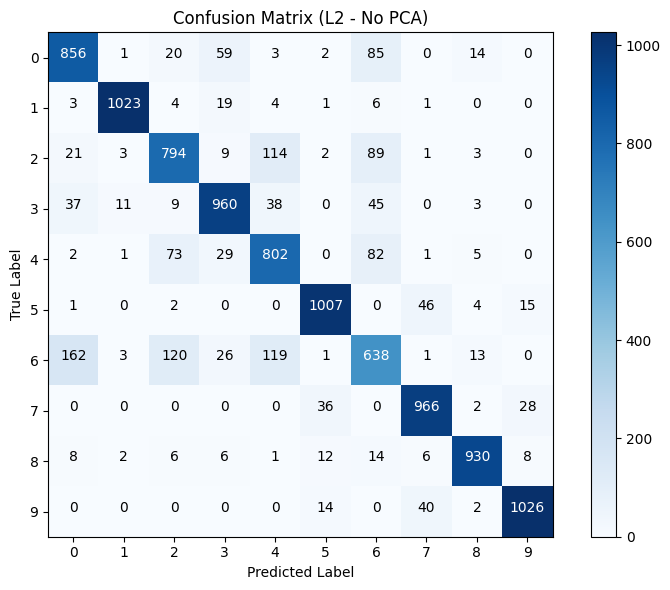

In [9]:
# ---------------------------------------------------------------------------------
# 3. Overfitting Analysis
# ---------------------------------------------------------------------------------

print("\n--- Overfitting Analysis (No PCA) ---")

# Training Accuracy (for overfitting analysis)
y_train_pred_l2 = l2_model.predict(x_train_scaled)  # Use x_train_scaled
train_accuracy_l2 = accuracy_score(y_train, y_train_pred_l2)
print("Training Accuracy (L2 - No PCA):", train_accuracy_l2)
print("Test Accuracy (L2 - No PCA):", l2_acc)
print("Overfitting Gap (L2 - No PCA):", train_accuracy_l2 - l2_acc)

# Confusion Matrix (for detailed analysis)
conf_mat_l2 = confusion_matrix(y_test, l2_model.predict(x_test_scaled))  # Use x_test_scaled
print("\nConfusion Matrix (L2 - No PCA):\n", conf_mat_l2)

# Classification Report
class_report_l2 = classification_report(y_test, l2_model.predict(x_test_scaled))  # Use x_test_scaled
print("\nClassification Report (L2 - No PCA):\n", class_report_l2)

# ----- Confusion Matrix Visualization (without Seaborn) -----
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_l2, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (L2 - No PCA)')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add annotations
thresh = conf_mat_l2.max() / 2.
for i, j in np.ndindex(conf_mat_l2.shape[:2]):
    plt.text(j, i, f'{conf_mat_l2[i, j]}',
             horizontalalignment="center",
             color="white" if conf_mat_l2[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

Validation Loss Approximation

In [ ]:
# ---------------------------------------------------------------------------------
# Validation Loss Curves (Approximation using GridSearchCV)
# ---------------------------------------------------------------------------------

print("\n--- Validation Loss Approximation (No PCA) ---")

# Validation loss approximation from GridSearchCV (L2)
# GridSearchCV doesn't directly give "curves" but provides the best score for each fold.
# We can use these scores as a rough estimate of validation performance during hyperparameter tuning
print("CV Results (L2 - No PCA):")
print(grid_search_l2.cv_results_)

# You can extract mean validation scores for each C value to plot a rough "validation curve"
mean_val_scores_l2 = grid_search_l2.cv_results_['mean_test_score']
c_values_l2 = param_grid_l2['C']

# Check if the lengths match before plotting
if len(c_values_l2) != len(mean_val_scores_l2):
    print("Error: Lengths of C values and validation scores do not match!")
    print(f"Length of C values: {len(c_values_l2)}")
    print(f"Length of validation scores: {len(mean_val_scores_l2)}")
else:
    plt.figure(figsize=(8, 6))
    plt.plot(c_values_l2, mean_val_scores_l2, marker='o')
    plt.xscale('log')
    plt.xlabel("C (Inverse Regularization Strength)")
    plt.ylabel("Mean Validation Accuracy")
    plt.title("L2 Regularization: Validation Performance vs. C (No PCA)")
    plt.grid(True)
    plt.show()